## **1. one_cycle_samples.json 파일을 읽어서 아래의 그림과 같은 결과 만들기**

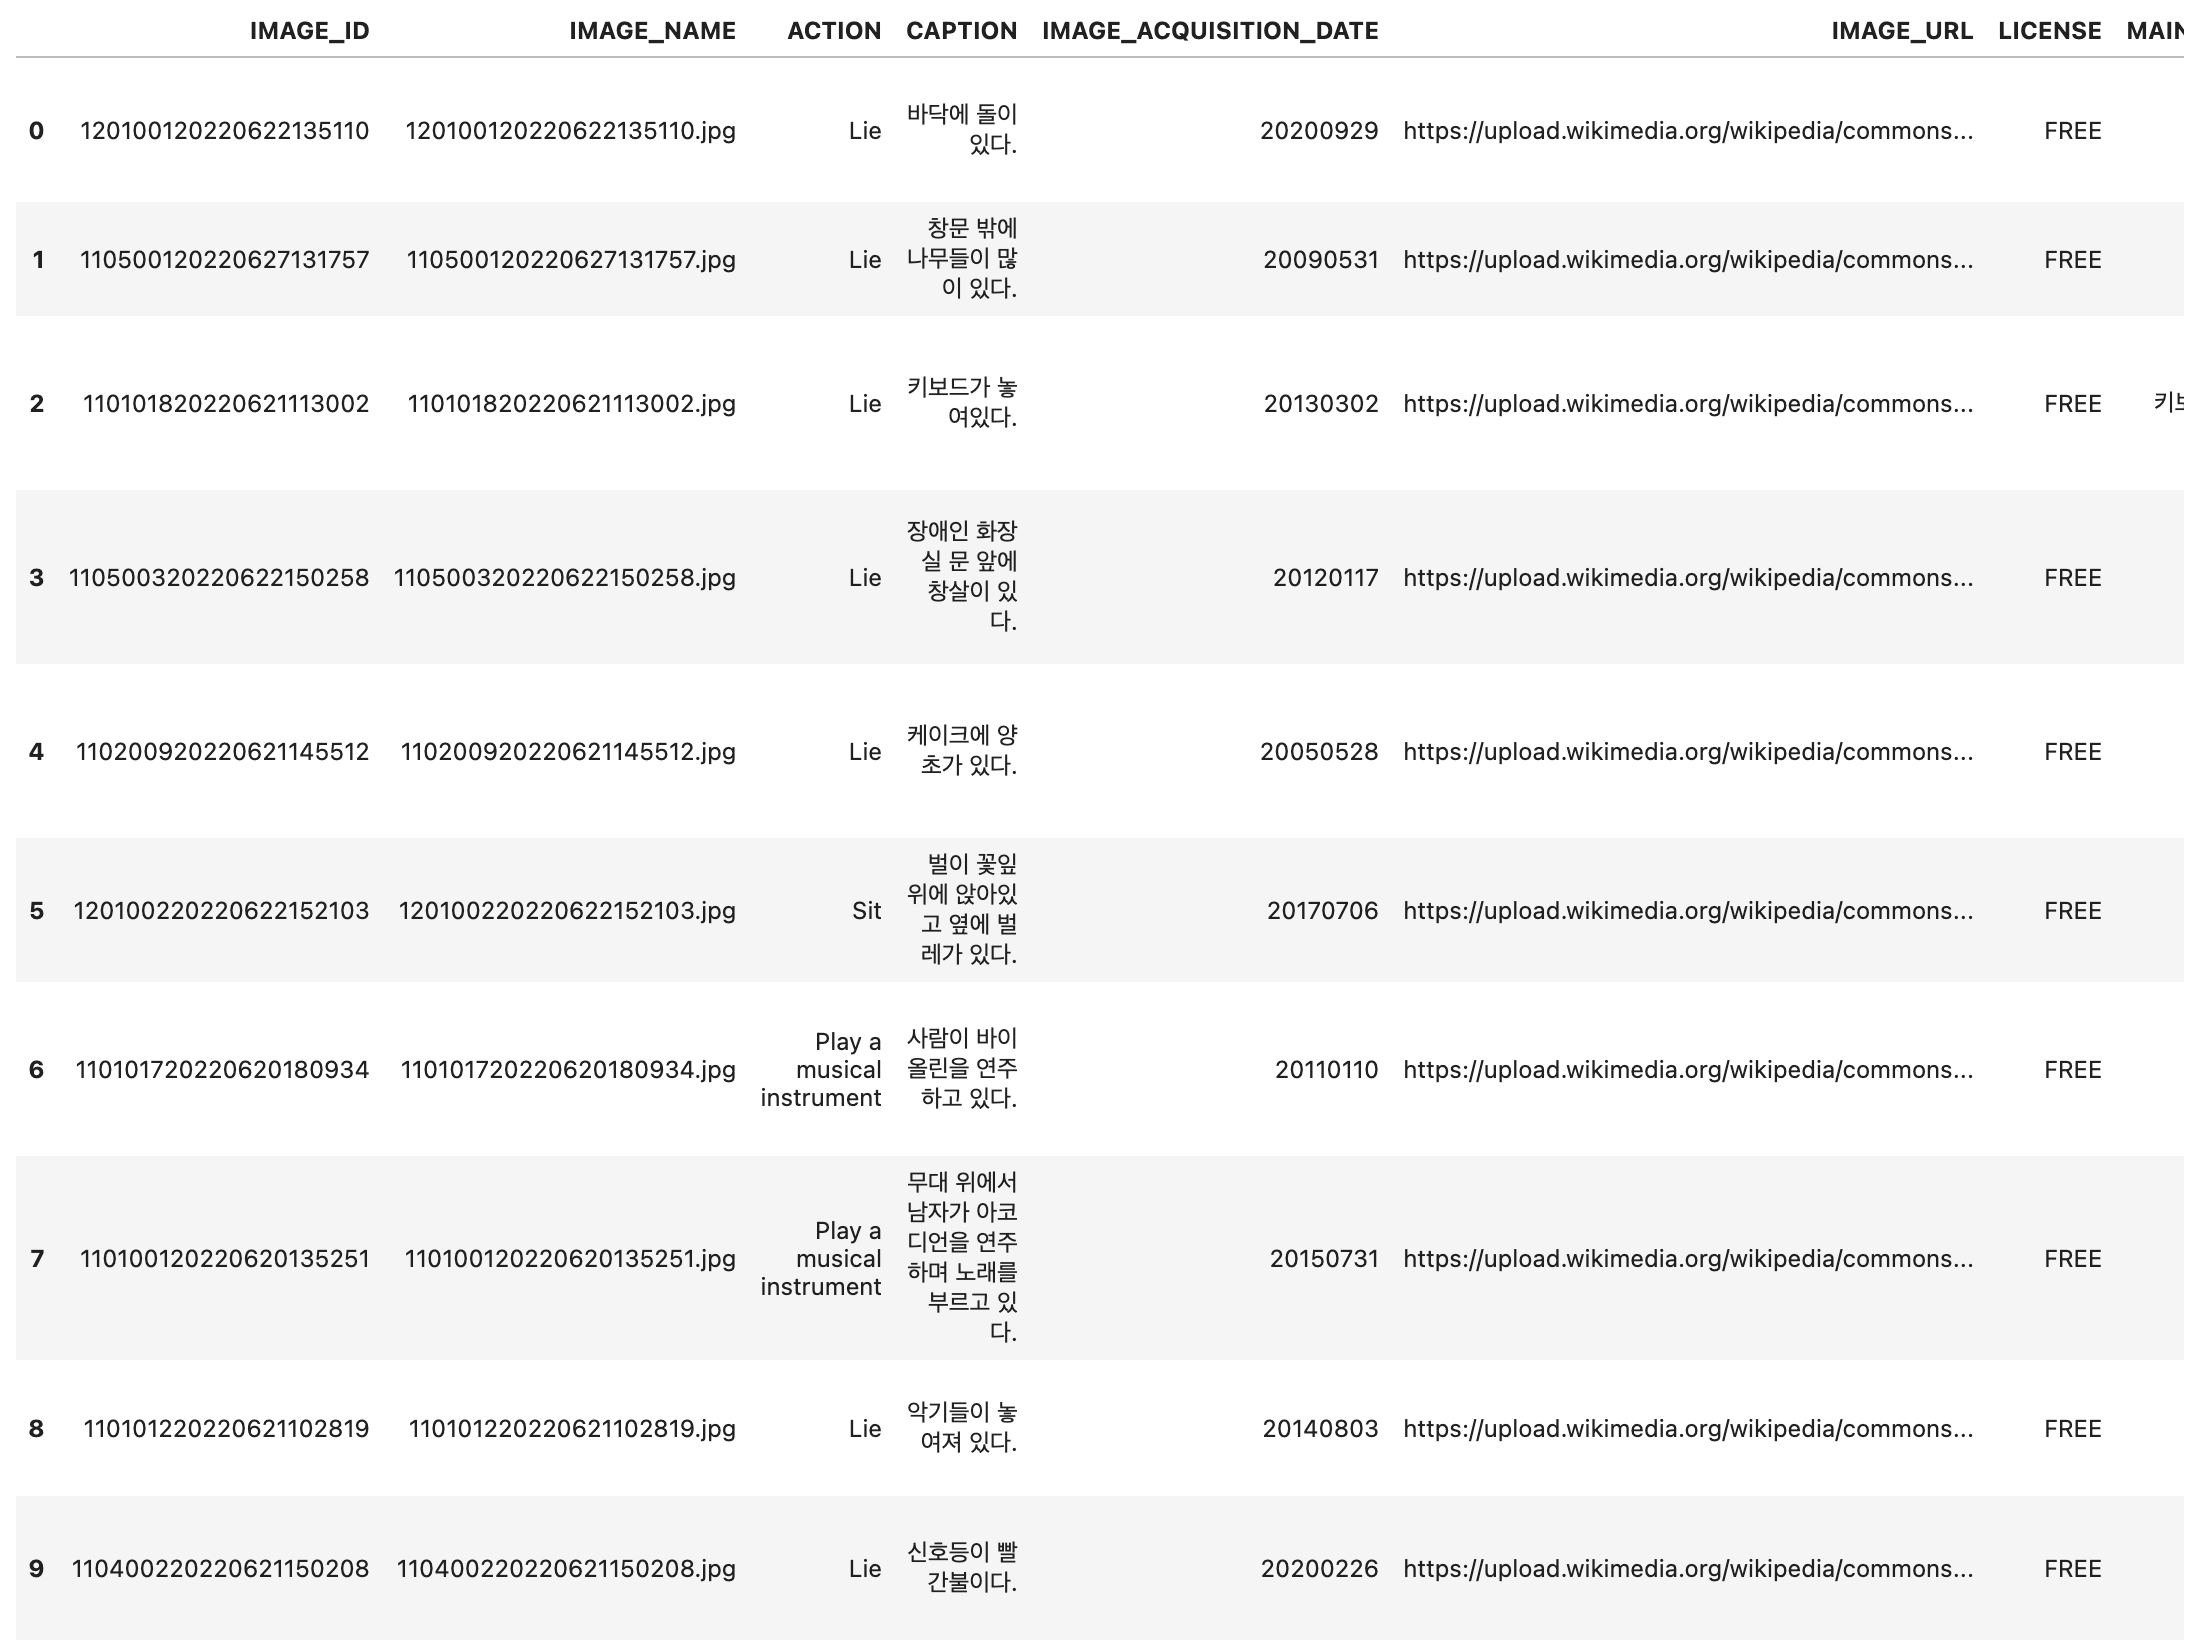

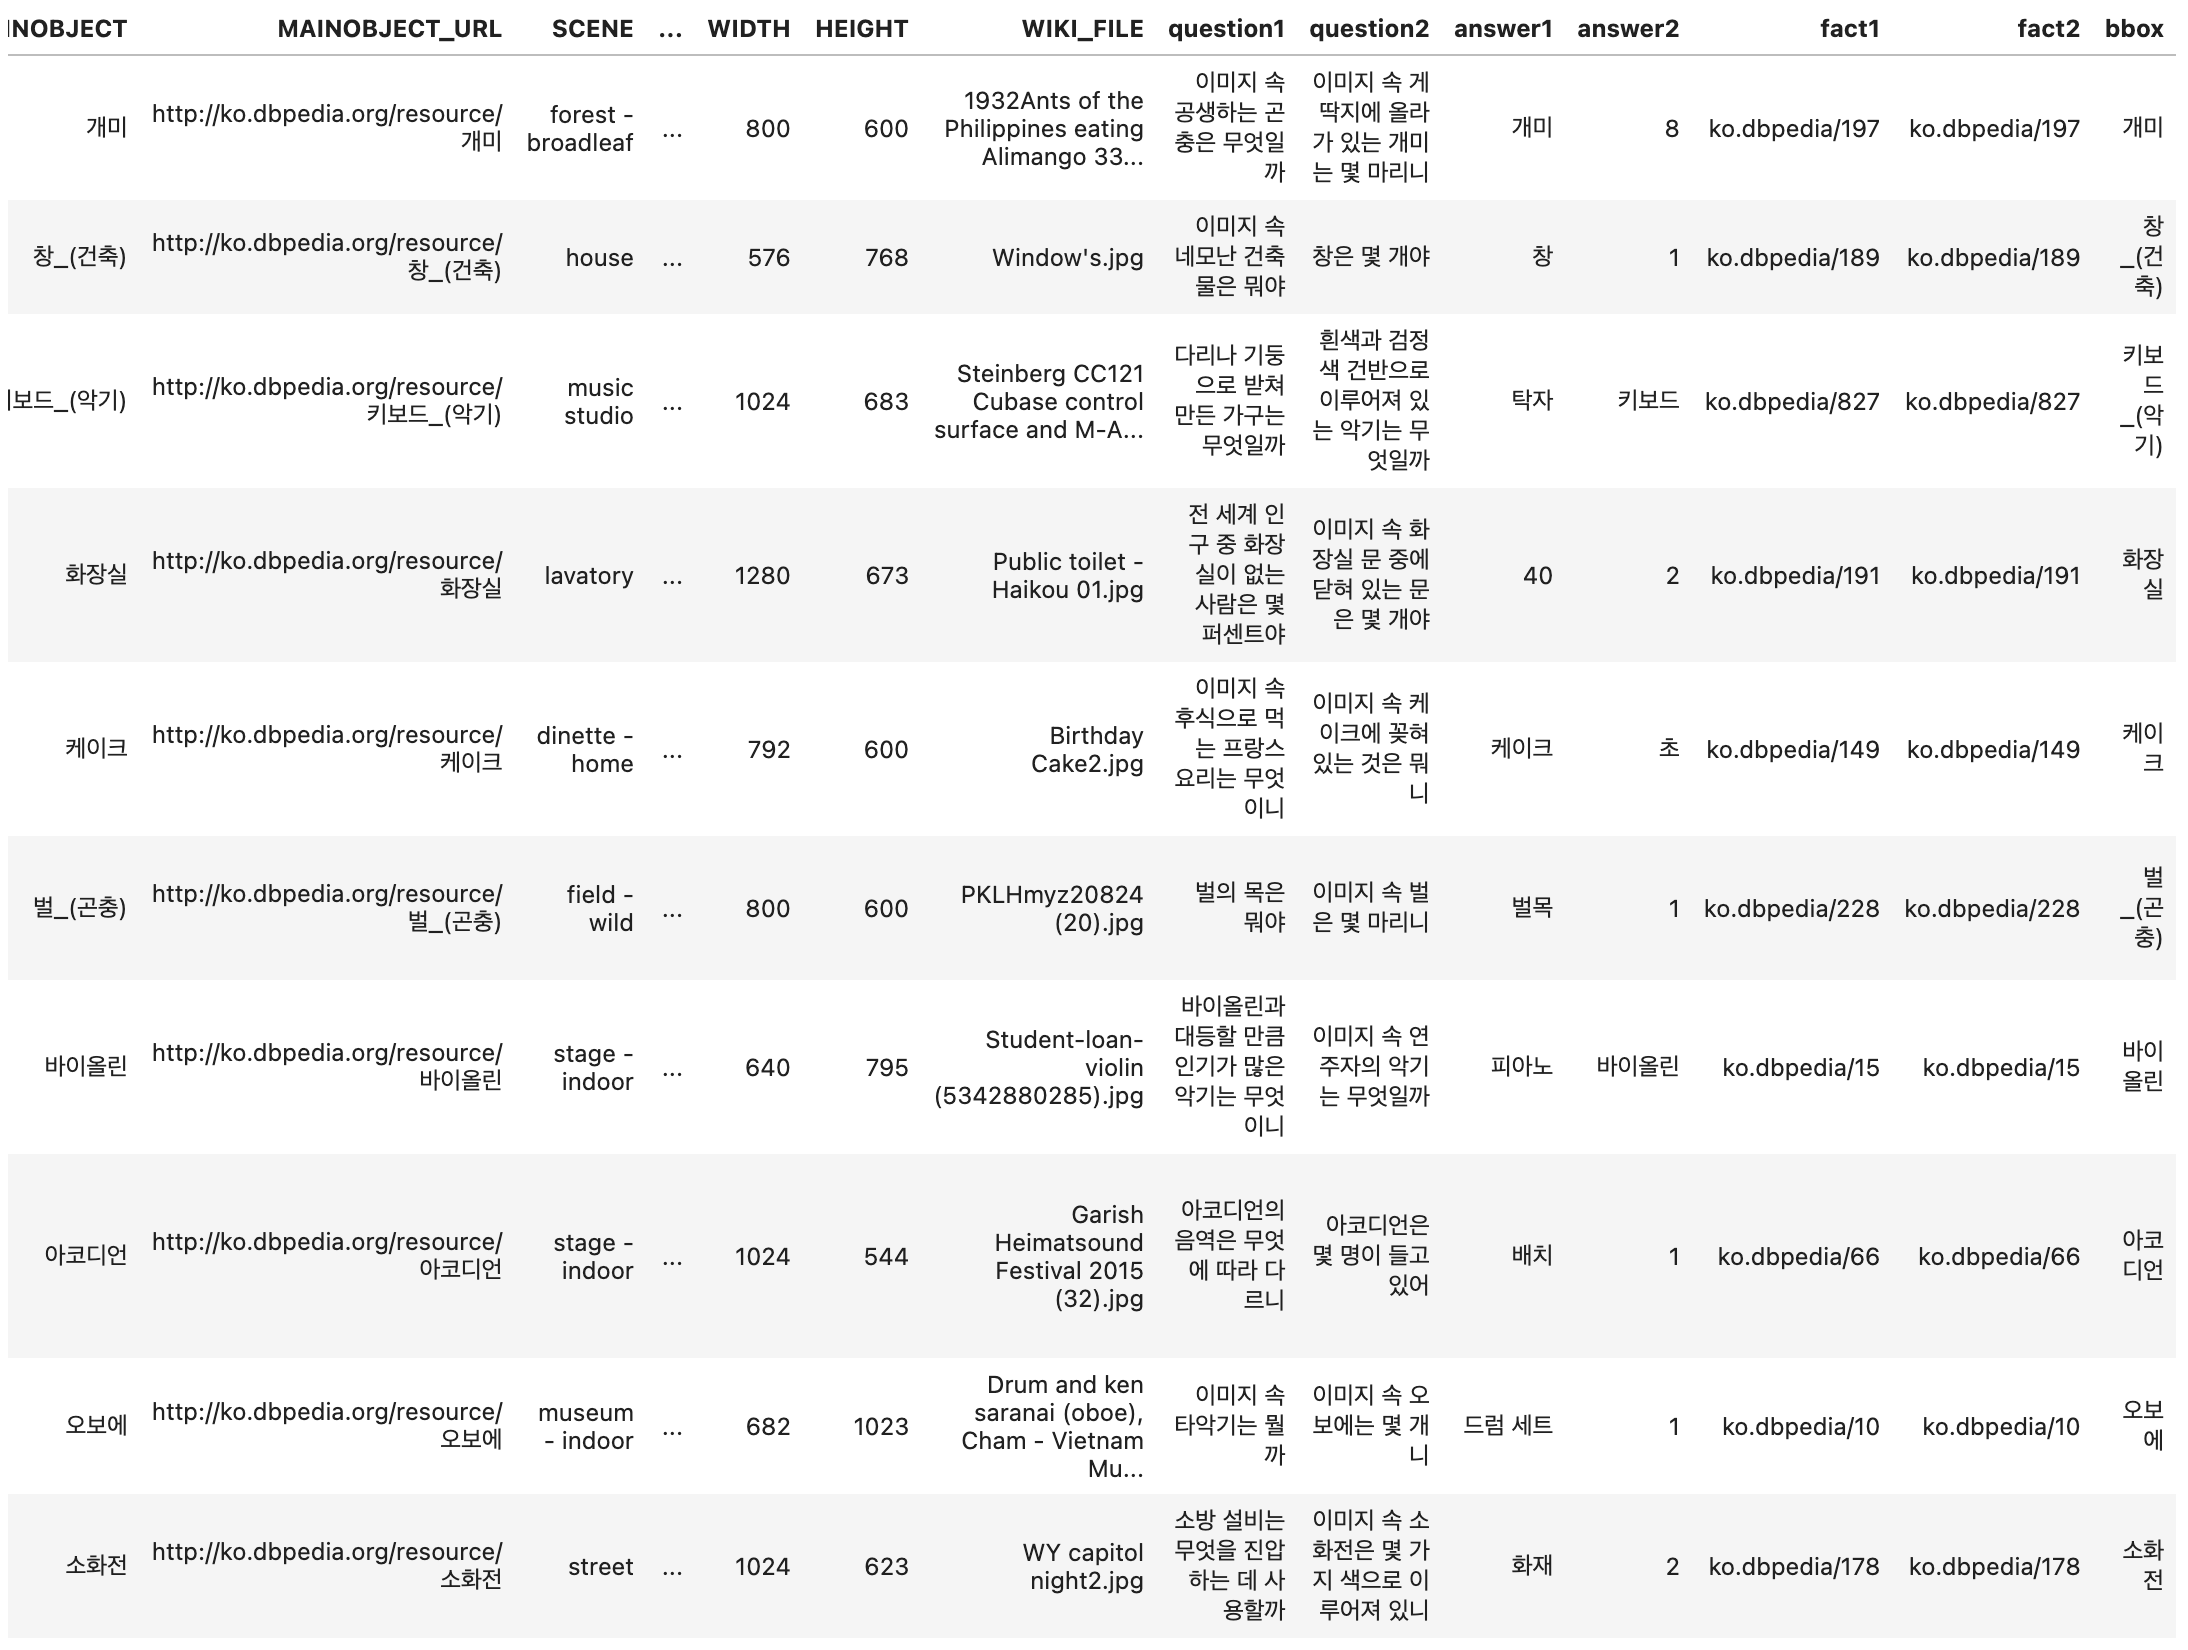

In [ ]:
import os

import numpy as np
import torch
import pandas as pd
import json

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
workspace_path = '/gdrive/My Drive/4학년 2학기/딥러닝/03. Partial differential for Machine Learning/03-1. ex_pandas/'

In [ ]:
json_file_path = os.path.join(workspace_path, 'one_cycle_samples.json')

In [ ]:
with open(json_file_path, "r") as sample:
    # json_data = json.load(sample, index ='annotation')
    json_data = json.load(sample)
json_data = json_data['annotations']
df = pd.DataFrame(json_data)

In [ ]:
df.head()

,IMAGE_ID,IMAGE_NAME,ACTION,CAPTION,IMAGE_ACQUISITION_DATE,IMAGE_URL,LICENSE,MAINOBJECT,MAINOBJECT_URL,SCENE,SUBOBJECT_1,SUBOBJECT_2,WIDTH,HEIGHT,WIKI_FILE,bounding_box,questions
0,120100120220622135110,120100120220622135110.jpg,Lie,바닥에 돌이 있다.,20200929,https://upload.wikimedia.org/wikipedia/commons...,FREE,개미,http://ko.dbpedia.org/resource/개미,forest - broadleaf,자갈,헛소리,800,600,1932Ants of the Philippines eating Alimango 33...,"[{'BOX_ID': '629421', 'OBJECT': '개미', 'X_COORD...","[{'question_id': '120100120220622135110-1', 'q..."
1,110500120220627131757,110500120220627131757.jpg,Lie,창문 밖에 나무들이 많이 있다.,20090531,https://upload.wikimedia.org/wikipedia/commons...,FREE,창_(건축),http://ko.dbpedia.org/resource/창_(건축),house,유리 바구니,오리,576,768,Window's.jpg,"[{'BOX_ID': '629403', 'OBJECT': '창_(건축)', 'X_C...","[{'question_id': '110500120220627131757-1', 'q..."
2,110101820220621113002,110101820220621113002.jpg,Lie,키보드가 놓여있다.,20130302,https://upload.wikimedia.org/wikipedia/commons...,FREE,키보드_(악기),http://ko.dbpedia.org/resource/키보드_(악기),music studio,오디오 인터페이스,탁자,1024,683,Steinberg CC121 Cubase control surface and M-A...,"[{'BOX_ID': '629527', 'OBJECT': '키보드_(악기)', 'X...","[{'question_id': '110101820220621113002-1', 'q..."
3,110500320220622150258,110500320220622150258.jpg,Lie,장애인 화장실 문 앞에 창살이 있다.,20120117,https://upload.wikimedia.org/wikipedia/commons...,FREE,화장실,http://ko.dbpedia.org/resource/화장실,lavatory,탁자,의자,1280,673,Public toilet - Haikou 01.jpg,"[{'BOX_ID': '629520', 'OBJECT': '화장실', 'X_COOR...","[{'question_id': '110500320220622150258-1', 'q..."
4,110200920220621145512,110200920220621145512.jpg,Lie,케이크에 양초가 있다.,20050528,https://upload.wikimedia.org/wikipedia/commons...,FREE,케이크,http://ko.dbpedia.org/resource/케이크,dinette - home,양초,넵킨,792,600,Birthday Cake2.jpg,"[{'BOX_ID': '629628', 'OBJECT': '케이크', 'X_COOR...","[{'question_id': '110200920220621145512-1', 'q..."


In [ ]:
for i in range(len(df)):
    for j in df.loc[i,'bounding_box']:
        obj = j['OBJECT']
        df.loc[i,'bounding_box'] = obj

In [ ]:
df.rename(columns = {'bounding_box':'bbox'},inplace=True)

In [ ]:
question1 = []
question2 = []

In [ ]:
for i in range(len(df)):
    for j in df.loc[i,'questions']:
        q = j['question_ko']
        num = j['question_id']
        if num[-1] == '1':
            question1.append(q)
        elif num[-1] == '2':
            question2.append(q)

In [ ]:
df['question1'] = question1
df['question2'] = question2

In [ ]:
answer1 = []
answer2 = []

In [ ]:
for i in range(len(df)):
    for j in df.loc[i,'questions']:
        answer = j['answer_ko']
        num = j['question_id']
        if num[-1] == '1':
            answer1.append(answer)
        elif num[-1] == '2':
            answer2.append(answer)

In [ ]:
answer1[:5]

['개미', '창', '탁자', '40', '케이크']

In [ ]:
answer2[:5]

['8', '1', '키보드', '2', '초']

In [ ]:
df['answer1'] = answer1
df['answer2'] = answer2

In [ ]:
df.head()

,IMAGE_ID,IMAGE_NAME,ACTION,CAPTION,IMAGE_ACQUISITION_DATE,IMAGE_URL,LICENSE,MAINOBJECT,MAINOBJECT_URL,SCENE,...,SUBOBJECT_2,WIDTH,HEIGHT,WIKI_FILE,bbox,questions,question1,question2,answer1,answer2
0,120100120220622135110,120100120220622135110.jpg,Lie,바닥에 돌이 있다.,20200929,https://upload.wikimedia.org/wikipedia/commons...,FREE,개미,http://ko.dbpedia.org/resource/개미,forest - broadleaf,...,헛소리,800,600,1932Ants of the Philippines eating Alimango 33...,개미,"[{'question_id': '120100120220622135110-1', 'q...",이미지 속 공생하는 곤충은 무엇일까,이미지 속 게 딱지에 올라가 있는 개미는 몇 마리니,개미,8
1,110500120220627131757,110500120220627131757.jpg,Lie,창문 밖에 나무들이 많이 있다.,20090531,https://upload.wikimedia.org/wikipedia/commons...,FREE,창_(건축),http://ko.dbpedia.org/resource/창_(건축),house,...,오리,576,768,Window's.jpg,창_(건축),"[{'question_id': '110500120220627131757-1', 'q...",이미지 속 네모난 건축물은 뭐야,창은 몇 개야,창,1
2,110101820220621113002,110101820220621113002.jpg,Lie,키보드가 놓여있다.,20130302,https://upload.wikimedia.org/wikipedia/commons...,FREE,키보드_(악기),http://ko.dbpedia.org/resource/키보드_(악기),music studio,...,탁자,1024,683,Steinberg CC121 Cubase control surface and M-A...,키보드_(악기),"[{'question_id': '110101820220621113002-1', 'q...",다리나 기둥으로 받쳐 만든 가구는 무엇일까,흰색과 검정색 건반으로 이루어져 있는 악기는 무엇일까,탁자,키보드
3,110500320220622150258,110500320220622150258.jpg,Lie,장애인 화장실 문 앞에 창살이 있다.,20120117,https://upload.wikimedia.org/wikipedia/commons...,FREE,화장실,http://ko.dbpedia.org/resource/화장실,lavatory,...,의자,1280,673,Public toilet - Haikou 01.jpg,화장실,"[{'question_id': '110500320220622150258-1', 'q...",전 세계 인구 중 화장실이 없는 사람은 몇 퍼센트야,이미지 속 화장실 문 중에 닫혀 있는 문은 몇 개야,40,2
4,110200920220621145512,110200920220621145512.jpg,Lie,케이크에 양초가 있다.,20050528,https://upload.wikimedia.org/wikipedia/commons...,FREE,케이크,http://ko.dbpedia.org/resource/케이크,dinette - home,...,넵킨,792,600,Birthday Cake2.jpg,케이크,"[{'question_id': '110200920220621145512-1', 'q...",이미지 속 후식으로 먹는 프랑스 요리는 무엇이니,이미지 속 케이크에 꽂혀있는 것은 뭐니,케이크,초


In [ ]:
fact1 = []
fact2 = []

In [ ]:
for i in range(len(df)):
    for j in df.loc[i,'questions']:
        fact = j['fact'][0]
        num = j['question_id']
        if num[-1] == '1':
            fact1.append(fact)
        elif num[-1] == '2':
            fact2.append(fact)

In [ ]:
fact1[:5]

['ko.dbpedia/197',
 'ko.dbpedia/189',
 'ko.dbpedia/827',
 'ko.dbpedia/191',
 'ko.dbpedia/149']

In [ ]:
fact2[:5]

['ko.dbpedia/197',
 'ko.dbpedia/189',
 'ko.dbpedia/827',
 'ko.dbpedia/191',
 'ko.dbpedia/149']

In [ ]:
df['fact1'] = fact1
df['fact2'] = fact2

In [ ]:
df.head()

,IMAGE_ID,IMAGE_NAME,ACTION,CAPTION,IMAGE_ACQUISITION_DATE,IMAGE_URL,LICENSE,MAINOBJECT,MAINOBJECT_URL,SCENE,...,HEIGHT,WIKI_FILE,bbox,questions,question1,question2,answer1,answer2,fact1,fact2
0,120100120220622135110,120100120220622135110.jpg,Lie,바닥에 돌이 있다.,20200929,https://upload.wikimedia.org/wikipedia/commons...,FREE,개미,http://ko.dbpedia.org/resource/개미,forest - broadleaf,...,600,1932Ants of the Philippines eating Alimango 33...,개미,"[{'question_id': '120100120220622135110-1', 'q...",이미지 속 공생하는 곤충은 무엇일까,이미지 속 게 딱지에 올라가 있는 개미는 몇 마리니,개미,8,ko.dbpedia/197,ko.dbpedia/197
1,110500120220627131757,110500120220627131757.jpg,Lie,창문 밖에 나무들이 많이 있다.,20090531,https://upload.wikimedia.org/wikipedia/commons...,FREE,창_(건축),http://ko.dbpedia.org/resource/창_(건축),house,...,768,Window's.jpg,창_(건축),"[{'question_id': '110500120220627131757-1', 'q...",이미지 속 네모난 건축물은 뭐야,창은 몇 개야,창,1,ko.dbpedia/189,ko.dbpedia/189
2,110101820220621113002,110101820220621113002.jpg,Lie,키보드가 놓여있다.,20130302,https://upload.wikimedia.org/wikipedia/commons...,FREE,키보드_(악기),http://ko.dbpedia.org/resource/키보드_(악기),music studio,...,683,Steinberg CC121 Cubase control surface and M-A...,키보드_(악기),"[{'question_id': '110101820220621113002-1', 'q...",다리나 기둥으로 받쳐 만든 가구는 무엇일까,흰색과 검정색 건반으로 이루어져 있는 악기는 무엇일까,탁자,키보드,ko.dbpedia/827,ko.dbpedia/827
3,110500320220622150258,110500320220622150258.jpg,Lie,장애인 화장실 문 앞에 창살이 있다.,20120117,https://upload.wikimedia.org/wikipedia/commons...,FREE,화장실,http://ko.dbpedia.org/resource/화장실,lavatory,...,673,Public toilet - Haikou 01.jpg,화장실,"[{'question_id': '110500320220622150258-1', 'q...",전 세계 인구 중 화장실이 없는 사람은 몇 퍼센트야,이미지 속 화장실 문 중에 닫혀 있는 문은 몇 개야,40,2,ko.dbpedia/191,ko.dbpedia/191
4,110200920220621145512,110200920220621145512.jpg,Lie,케이크에 양초가 있다.,20050528,https://upload.wikimedia.org/wikipedia/commons...,FREE,케이크,http://ko.dbpedia.org/resource/케이크,dinette - home,...,600,Birthday Cake2.jpg,케이크,"[{'question_id': '110200920220621145512-1', 'q...",이미지 속 후식으로 먹는 프랑스 요리는 무엇이니,이미지 속 케이크에 꽂혀있는 것은 뭐니,케이크,초,ko.dbpedia/149,ko.dbpedia/149


In [ ]:
df = df.drop('questions', axis=1)

In [ ]:
df.head()

,IMAGE_ID,IMAGE_NAME,ACTION,CAPTION,IMAGE_ACQUISITION_DATE,IMAGE_URL,LICENSE,MAINOBJECT,MAINOBJECT_URL,SCENE,...,WIDTH,HEIGHT,WIKI_FILE,bbox,question1,question2,answer1,answer2,fact1,fact2
0,120100120220622135110,120100120220622135110.jpg,Lie,바닥에 돌이 있다.,20200929,https://upload.wikimedia.org/wikipedia/commons...,FREE,개미,http://ko.dbpedia.org/resource/개미,forest - broadleaf,...,800,600,1932Ants of the Philippines eating Alimango 33...,개미,이미지 속 공생하는 곤충은 무엇일까,이미지 속 게 딱지에 올라가 있는 개미는 몇 마리니,개미,8,ko.dbpedia/197,ko.dbpedia/197
1,110500120220627131757,110500120220627131757.jpg,Lie,창문 밖에 나무들이 많이 있다.,20090531,https://upload.wikimedia.org/wikipedia/commons...,FREE,창_(건축),http://ko.dbpedia.org/resource/창_(건축),house,...,576,768,Window's.jpg,창_(건축),이미지 속 네모난 건축물은 뭐야,창은 몇 개야,창,1,ko.dbpedia/189,ko.dbpedia/189
2,110101820220621113002,110101820220621113002.jpg,Lie,키보드가 놓여있다.,20130302,https://upload.wikimedia.org/wikipedia/commons...,FREE,키보드_(악기),http://ko.dbpedia.org/resource/키보드_(악기),music studio,...,1024,683,Steinberg CC121 Cubase control surface and M-A...,키보드_(악기),다리나 기둥으로 받쳐 만든 가구는 무엇일까,흰색과 검정색 건반으로 이루어져 있는 악기는 무엇일까,탁자,키보드,ko.dbpedia/827,ko.dbpedia/827
3,110500320220622150258,110500320220622150258.jpg,Lie,장애인 화장실 문 앞에 창살이 있다.,20120117,https://upload.wikimedia.org/wikipedia/commons...,FREE,화장실,http://ko.dbpedia.org/resource/화장실,lavatory,...,1280,673,Public toilet - Haikou 01.jpg,화장실,전 세계 인구 중 화장실이 없는 사람은 몇 퍼센트야,이미지 속 화장실 문 중에 닫혀 있는 문은 몇 개야,40,2,ko.dbpedia/191,ko.dbpedia/191
4,110200920220621145512,110200920220621145512.jpg,Lie,케이크에 양초가 있다.,20050528,https://upload.wikimedia.org/wikipedia/commons...,FREE,케이크,http://ko.dbpedia.org/resource/케이크,dinette - home,...,792,600,Birthday Cake2.jpg,케이크,이미지 속 후식으로 먹는 프랑스 요리는 무엇이니,이미지 속 케이크에 꽂혀있는 것은 뭐니,케이크,초,ko.dbpedia/149,ko.dbpedia/149
